In [42]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
#read file
whale_returns = Path("../Starter_Code/Resources/whale_returns.csv")
sp500_history = Path("../Starter_Code/Resources/sp500_history.csv")
algo_returns = Path ("../Starter_Code/Resources/algo_returns.csv")

In [44]:
# read file and create df for whale returns
whale_returnsdf = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [45]:
# read file and create df for sp500 history
sp500_historydf = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [46]:
# read file and create df for algo returns
algo_returnsdf = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [47]:
# Reading whale returns
whale_returnsdf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [48]:
# Count nulls
whale_returnsdf.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [67]:
whale_returnsdf.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [49]:
# Drop nulls
whale_returnsdf = whale_returnsdf.dropna()

In [50]:
whale_returnsdf.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [51]:
# Reading algorithmic returns
algo_returnsdf.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [52]:
# Count nulls
algo_returnsdf.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [53]:
# Drop nulls
algo_returnsdf.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [54]:
# Reading S&P 500 Closing Prices
sp500_historydf.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [55]:
# Check Data Types
sp500_historydf.dtypes

Close    object
dtype: object

In [56]:
# Fix Data Types
#sp500_historydf["Close"] = pd.to_numeric(sp500_historydf['Close'], errors='coerce')
sp500_historydf["Close"] = pd.to_numeric(sp500_historydf["Close"].str.replace("$",""))
print(sp500_historydf.dtypes)

Close    float64
dtype: object


C:\Users\seema\AppData\Local\Temp\ipykernel_7784\3141894738.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_historydf["Close"] = pd.to_numeric(sp500_historydf["Close"].str.replace("$",""))


In [57]:
# Calculate Daily Returns
daily_returns = sp500_historydf["Close"].pct_change()
print(daily_returns)

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1649, dtype: float64


In [58]:
# Drop nulls
sp500_historydf.dropna()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [59]:
# Rename `Close` Column to be specific to this portfolio.
sp500_historydf.rename(columns={'Close': 'sp500 Close'}, inplace=True)
sp500_historydf.head()

,sp500 Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [68]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_returnsdf, algo_returnsdf, sp500_historydf], axis= "columns", join="inner")
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


---

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

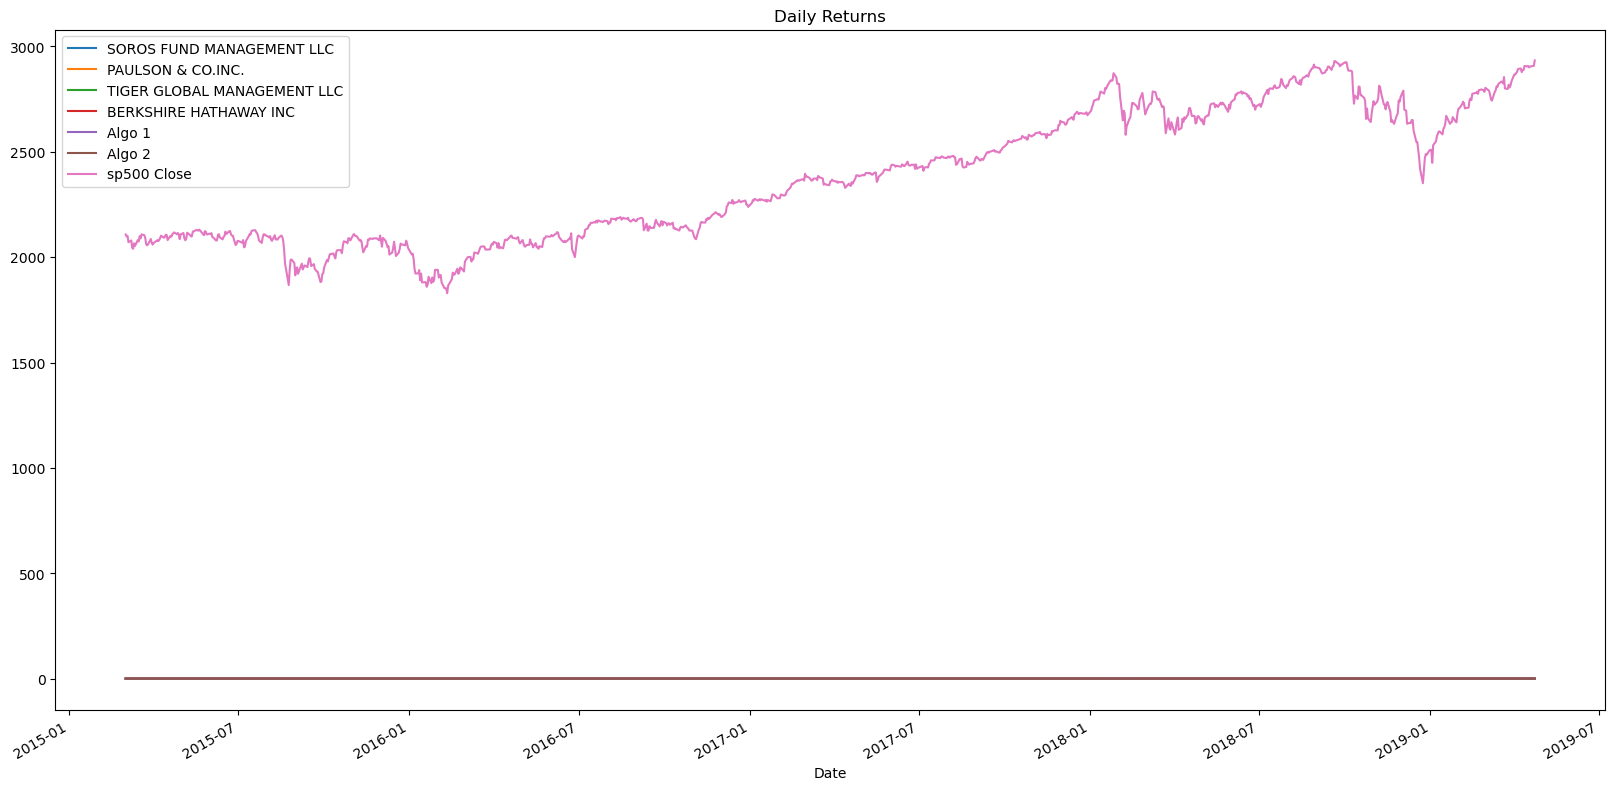

In [69]:
# Plot daily returns of all portfolios
returns_df.plot(figsize=(20,10), title="Daily Returns")

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

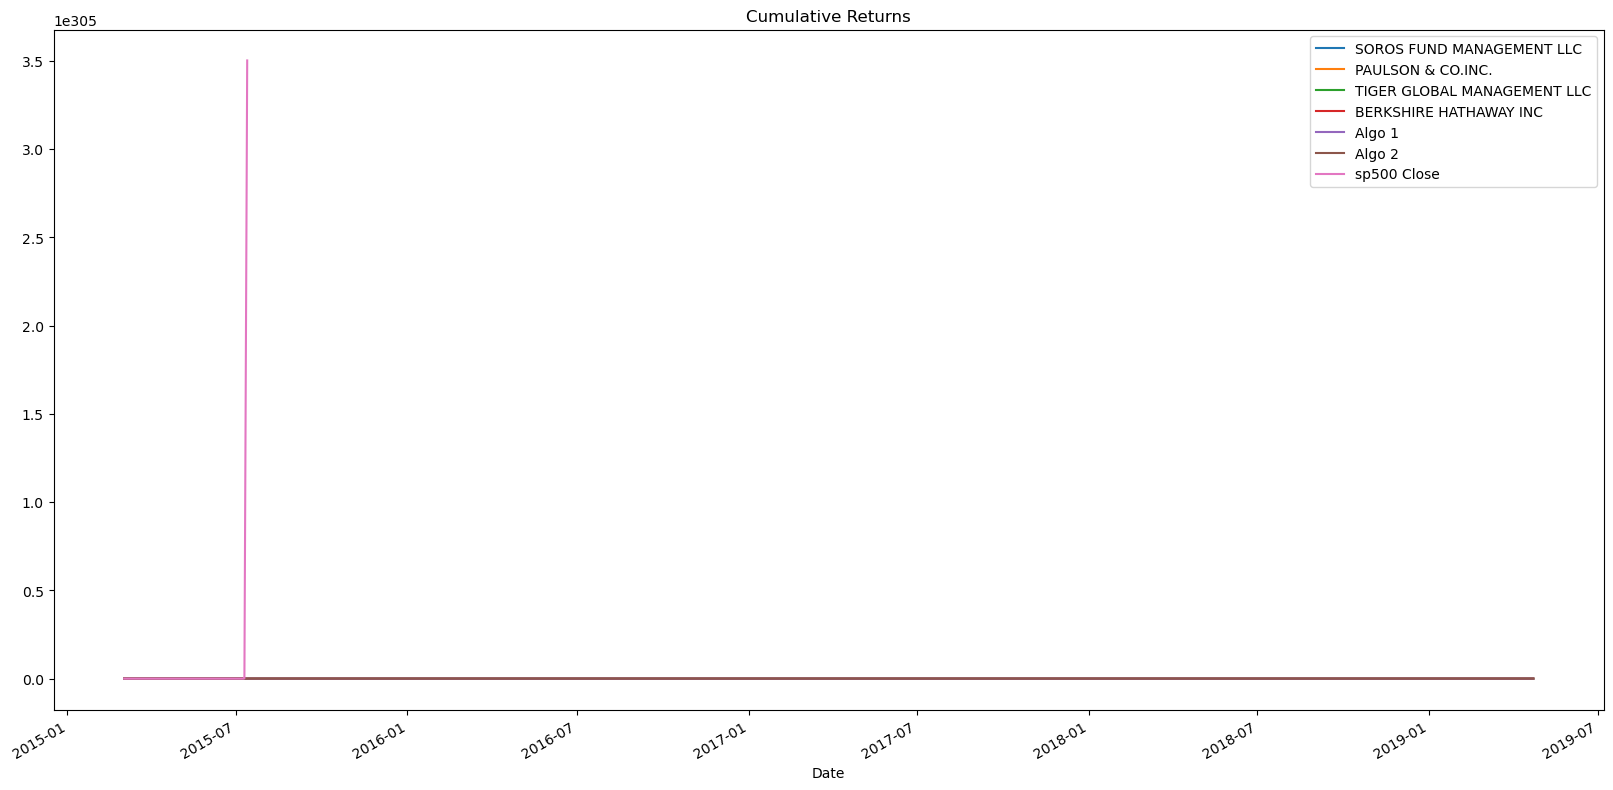

In [70]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + returns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

---

<AxesSubplot:title={'center':'Portfolio Risk'}>

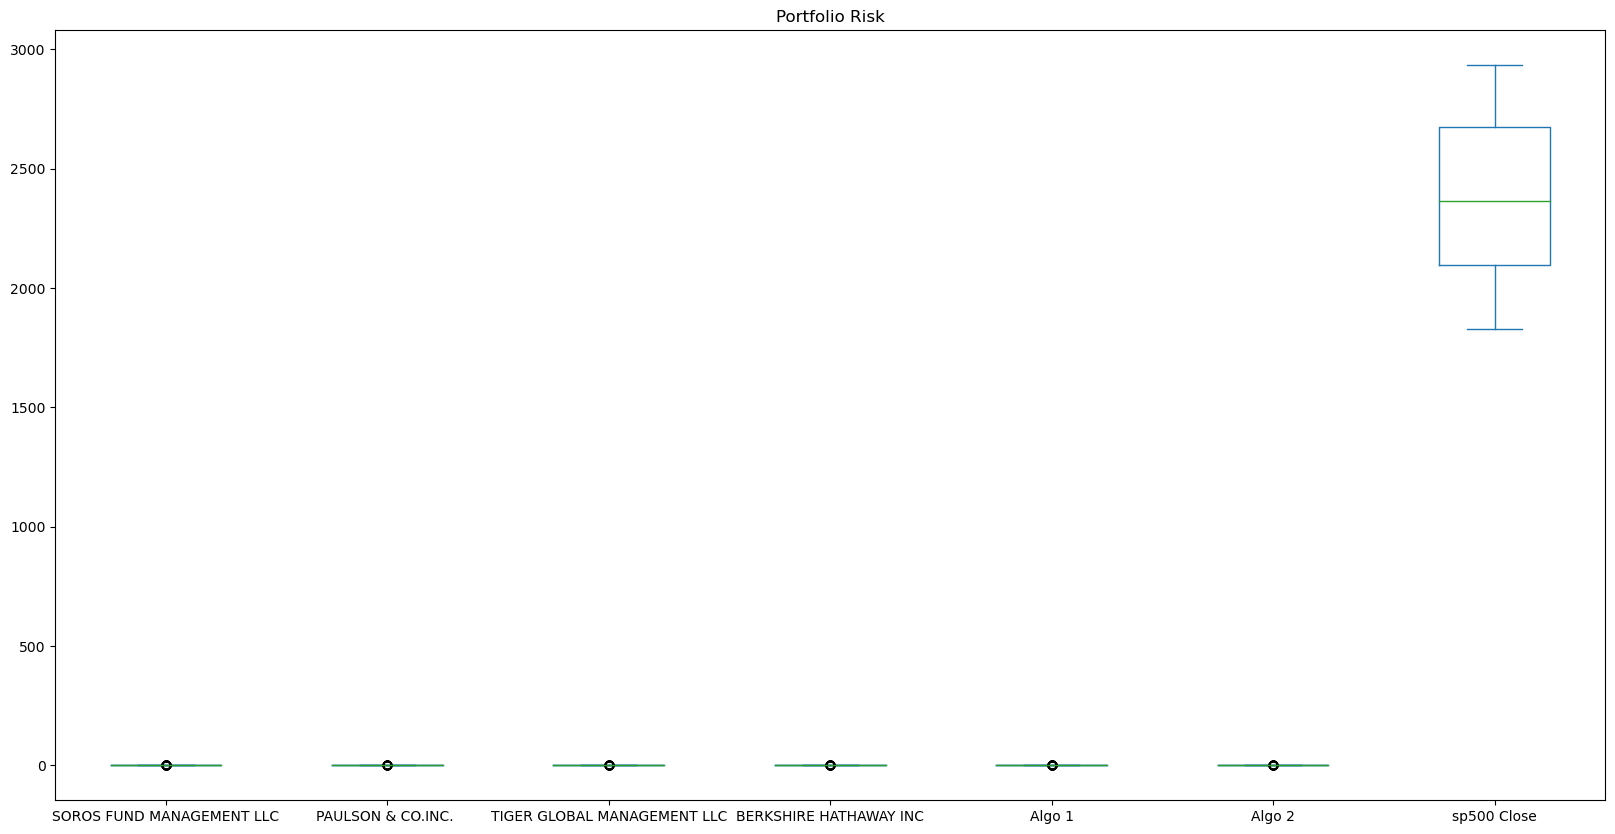

In [72]:
#Create a box plot for each portfolio
returns_df.plot.box(figsize=(20, 10), title="Portfolio Risk")

In [39]:
# Calculate the daily standard deviations of all portfolios
std_dev = returns_df.std()
print(std_dev)

SOROS FUND MANAGEMENT LLC        0.007842
PAULSON & CO.INC.                0.006977
TIGER GLOBAL MANAGEMENT LLC      0.010824
BERKSHIRE HATHAWAY INC           0.012831
Algo 1                           0.007972
Algo 2                           0.008466
Close                          402.122004
dtype: float64


In [40]:
# Calculate  the daily standard deviation of S&P 500
sp500std_dev = sp500_historydf.std()
print(sp500std_dev)

Close    402.122004
dtype: float64


In [120]:
# Determine which portfolios are riskier than the S&P 500
sp500_risk = returns_df["sp500 Close"].std()
#riskier_portfolios = std_dev[std_dev > std_dev["sp500std_dev"]]

In [75]:
anual_std = returns_df.std() * np.sqrt(252)
anual_std

SOROS FUND MANAGEMENT LLC         0.125335
PAULSON & CO.INC.                 0.111488
TIGER GLOBAL MANAGEMENT LLC       0.172936
BERKSHIRE HATHAWAY INC            0.205077
Algo 1                            0.120967
Algo 2                            0.132430
sp500 Close                    4855.251803
dtype: float64

---

<AxesSubplot:xlabel='Date'>

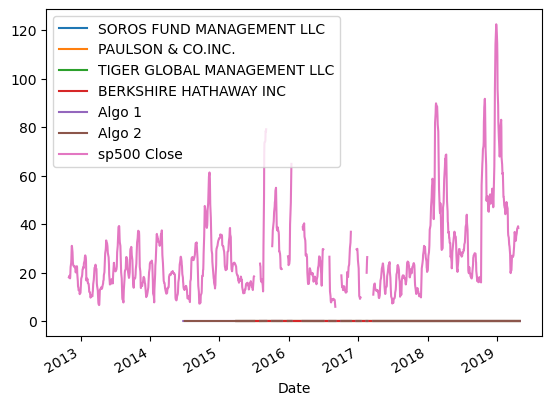

In [37]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window and plot the rolling std deviation
returns_df.rolling(window=21).std().plot()

In [76]:
# Calculate the correlation
# Display de correlation matrix
corr_df= returns_df.corr()
corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.033918
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.036711
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.047823
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.041547
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.012608
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.036267
sp500 Close,0.033918,0.036711,-0.047823,0.041547,-0.012608,0.036267,1.000000


<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

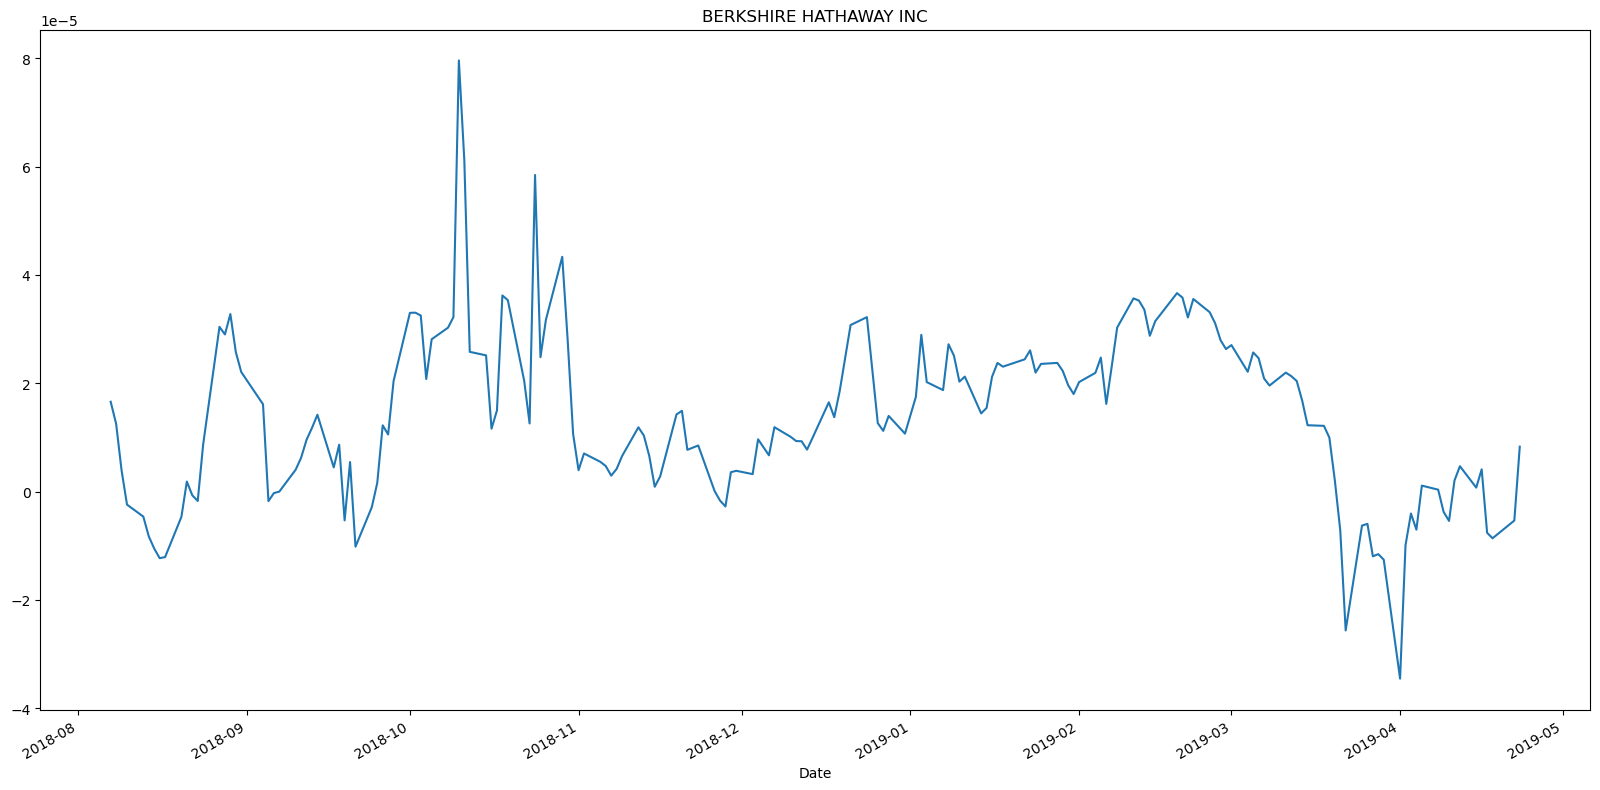

In [115]:
# Calculate covariance of a single portfolio
covariance = returns_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(returns_df["sp500 Close"])

# Calculate variance of S&P 500
variance = returns_df["sp500 Close"].rolling(60).var()
# Computing beta
beta = covariance/variance
# Plot beta trend
beta.plot(figsize=(20,10), title="BERKSHIRE HATHAWAY INC")

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

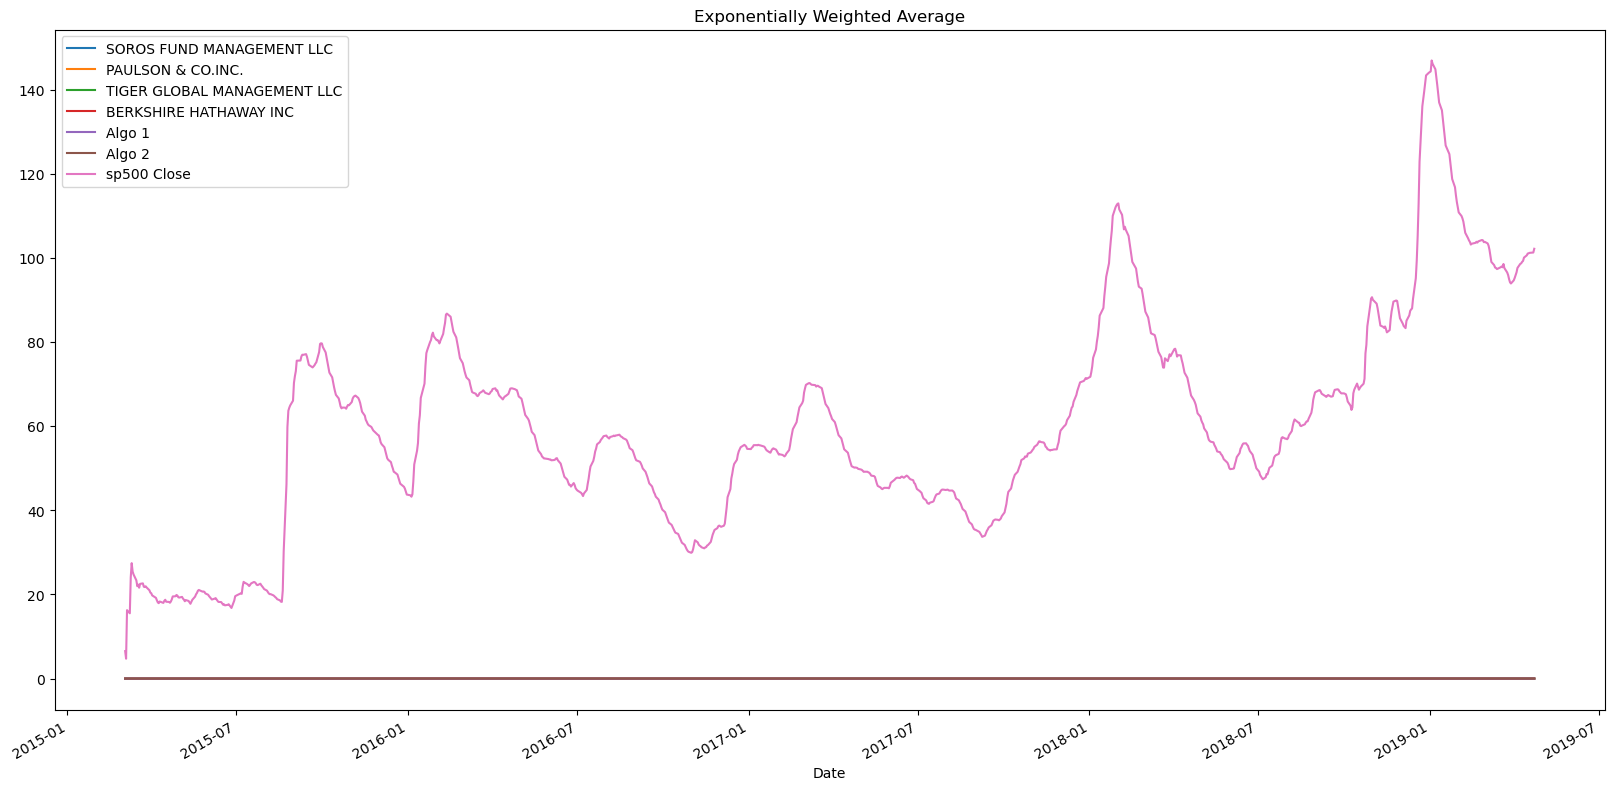

In [78]:
# Use `ewm` to calculate the rolling window
returns_df.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Average")

---

In [79]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns_df.mean() * 252) / (returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC        0.356417
PAULSON & CO.INC.               -0.483570
TIGER GLOBAL MANAGEMENT LLC     -0.121060
BERKSHIRE HATHAWAY INC           0.621810
Algo 1                           1.378648
Algo 2                           0.501364
sp500 Close                    123.476112
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

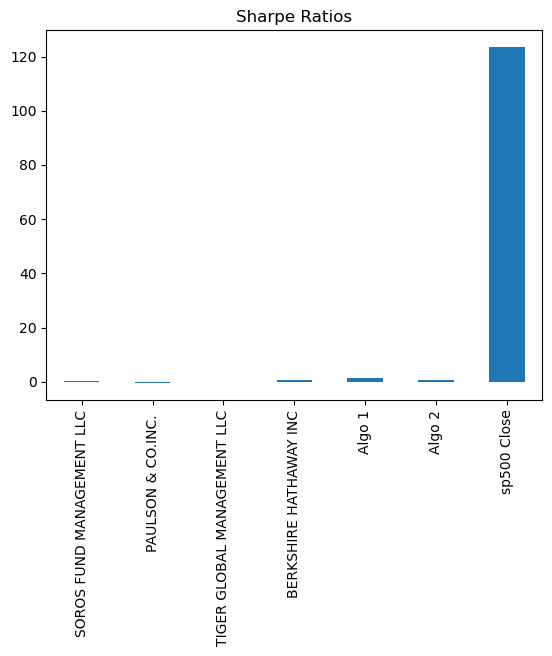

In [80]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Algo 1

Create a Custom Portfolio

In [85]:
#read the stock csv files
aapl_df = pd.read_csv("aapl_historical.csv", parse_dates=["Trade DATE"], index_col="Trade DATE")
cost_df = pd.read_csv("cost_historical.csv", parse_dates=["Trade DATE"], index_col="Trade DATE")
goog_df = pd.read_csv("goog_historical.csv", parse_dates=["Trade DATE"], index_col="Trade DATE")

In [86]:
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [87]:
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [88]:
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [94]:
#combine all stocks in a single df
all_stocks = pd.concat([aapl_df,goog_df,cost_df], axis="rows",join="inner")
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [95]:
#reset data index
all_stocks = all_stocks.reset_index()
all_stocks.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75


In [97]:
#reorgnize portfolio
portfolio = all_stocks.pivot_table(values ="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [98]:
# calculate daily returns for stocks
daily_returns = portfolio.pct_change()
# drop NAs
daily_returns = daily_returns.dropna().copy()
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [99]:
# calculate the weighted returns for the portfolio
weights = [1/3, 1/3, 1/3]
#calucate portfolio returns
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [100]:
# join the portfolio returns 
returns_df["Custom"] = portfolio_returns
returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Close,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,2907.97,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,2933.68,0.011959


Rerun the risk analysis

In [101]:
returns_df = returns_df.dropna().copy()

In [102]:
#Annulazied returns
risk = returns_df.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC         0.146675
PAULSON & CO.INC.                 0.116732
TIGER GLOBAL MANAGEMENT LLC       0.232531
BERKSHIRE HATHAWAY INC            0.247155
Algo 1                            0.133704
Algo 2                            0.139556
sp500 Close                    1741.970061
Custom                            0.211496
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

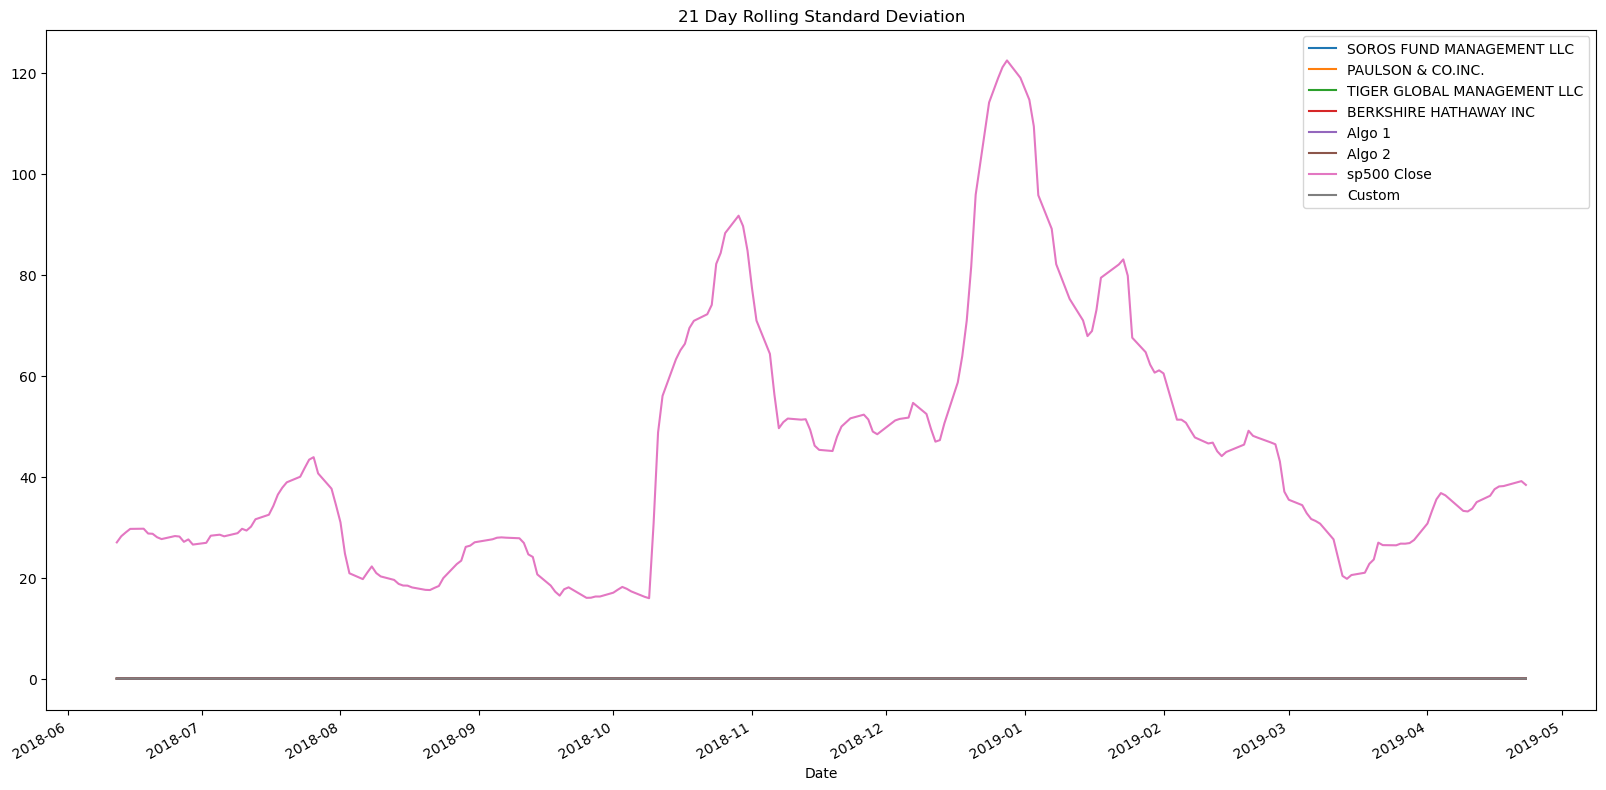

In [105]:
#calculated rolling std with 21 days window
rolling_std_dev = returns_df.rolling(window=21).std()

#plot rolling std d
rolling_std_dev.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")


In [106]:
# calculate and plot the correlation
df = returns_df.corr()
df.style.background_gradient(cmap="bwr")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Close,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.062726,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.091516,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.049143,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.017796,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,-0.056727,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.072243,0.739936
sp500 Close,0.062726,0.091516,0.049143,0.017796,-0.056727,0.072243,1.000000,0.150286
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.150286,1.000000


Calculate and plot beta for your portfolio

<AxesSubplot:title={'center':'custom portfolio beta'}, xlabel='Date'>

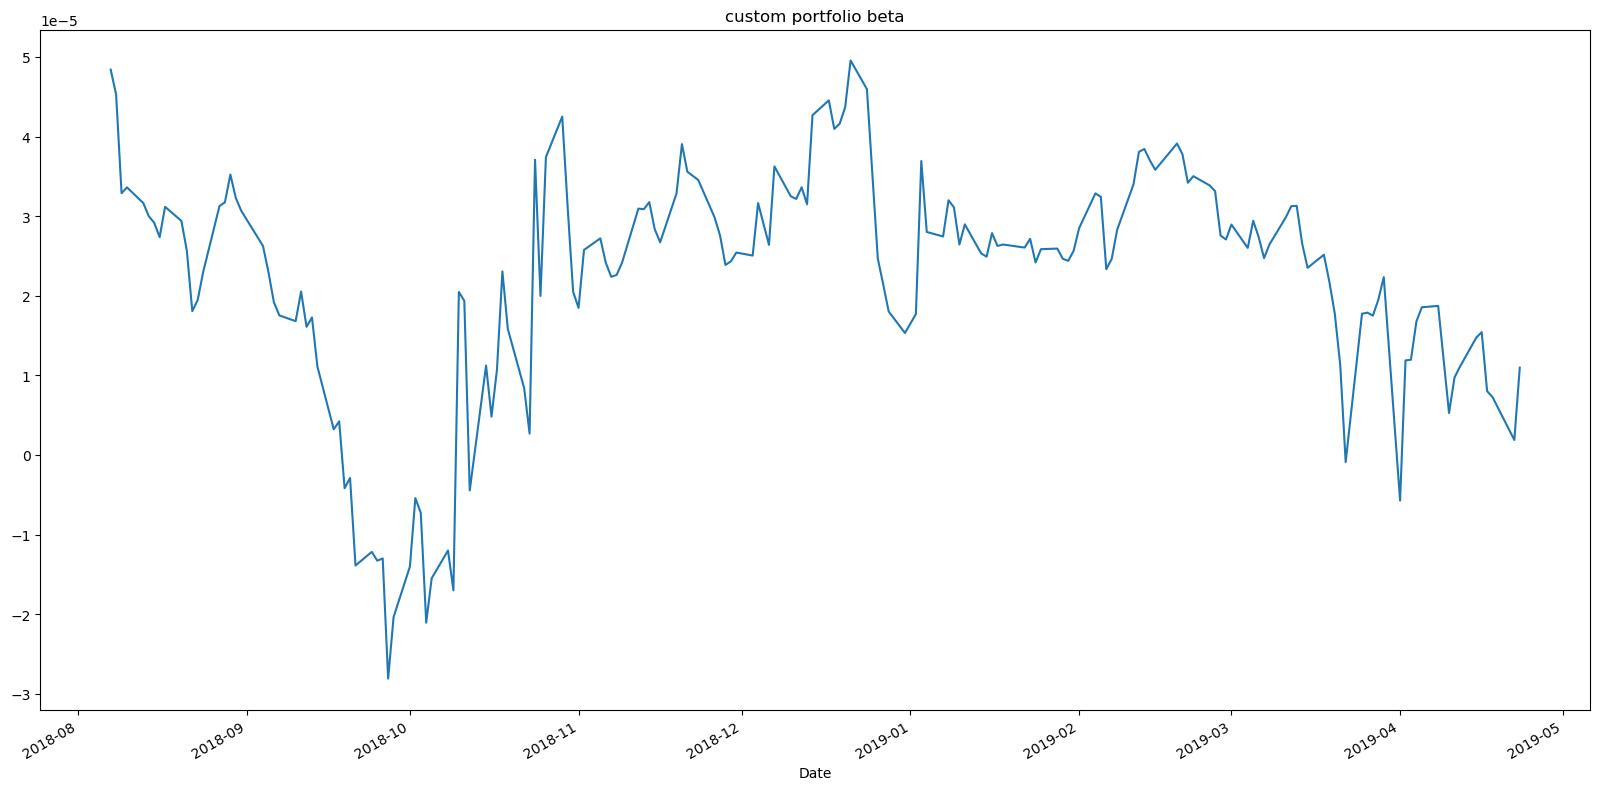

In [112]:
covariance = returns_df["Custom"].rolling(window=60).cov(returns_df["sp500 Close"])
variance = returns_df["sp500 Close"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20,10), title="custom portfolio beta")


In [118]:
#Annualized Shapre ration
sharpe_ratios = (returns_df.mean() * 252) / (returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC        0.430713
PAULSON & CO.INC.                0.258738
TIGER GLOBAL MANAGEMENT LLC     -1.034216
BERKSHIRE HATHAWAY INC           0.159756
Algo 1                           2.035665
Algo 2                           0.080607
sp500 Close                    399.829787
Custom                           0.933123
dtype: float64

<AxesSubplot:title={'center':'sharpe ratio'}>

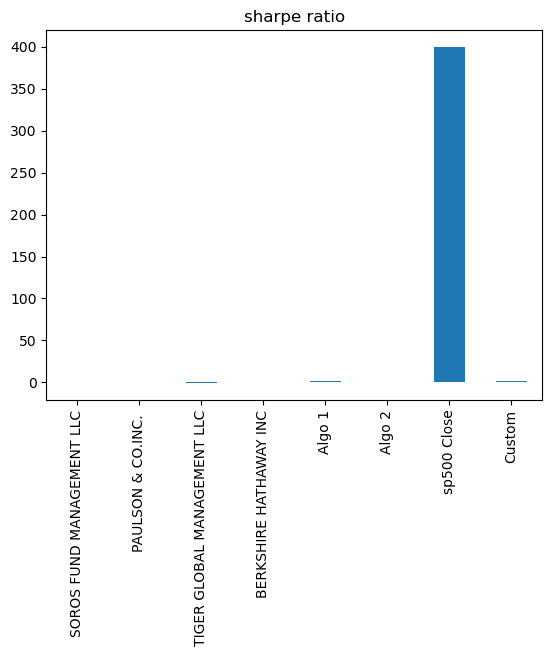

In [119]:
# vizulize
sharpe_ratios.plot(kind="bar", title= "sharpe ratio")

In [ ]:
How does the portofio do
Custom did better than other portfolios